In [18]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

# Process data

In [4]:
df = pd.read_csv("grants.csv")
details = pd.read_csv("grant_opportunity_details.csv")

C:\Users\lisa.hornung\AppData\Local\Temp\ipykernel_35016\3547180560.py:1: DtypeWarning: Columns (6,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("grants.csv")


In [66]:
df["posted_date"] = pd.to_datetime(df["posted_date"])

# Explore

In [10]:
df.columns

Index(['opportunity_id', 'opportunity_number', 'opportunity_title',
       'agency_code', 'agency_name', 'estimated_funding',
       'expected_number_of_awards', 'grantor_contact', 'agency_contact_phone',
       'agency_contact_email', 'estimated_post_date',
       'estimated_application_due_date', 'posted_date', 'close_date',
       'last_updated_date_time', 'version', 'opportunity_status'],
      dtype='object')

In [25]:
len(df)

74669

In [27]:
len(df["agency_name"].unique())

660

In [6]:
df["opportunity_status"].value_counts()

opportunity_status
Archived      65598
Closed         6528
Posted         1987
Forecasted      556
Name: count, dtype: int64

In [39]:
pivot = df["agency_name"].value_counts().to_frame().reset_index()
pivot = pivot[pivot["count"]>500]
pivot

,agency_name,count
0,National Institutes of Health,11239
1,National Park Service,8426
2,Fish and Wildlife Service,4122
3,Bureau of Land Management,2868
4,Geological Survey,2311
5,Centers for Disease Control and Prevention,1727
6,Health Resources and Services Administration,1609
7,Department of Education,1513
8,Dept. of the Army -- USAMRAA,1507
9,Environmental Protection Agency,1371


In [53]:
pivot = df["agency_name"].value_counts().to_frame().reset_index()
pivot = pivot[pivot["count"]>1000]
agency_filter = pivot["agency_name"].to_list()

In [54]:
agency_filter

['National Institutes of Health',
 'National Park Service',
 'Fish and Wildlife Service',
 'Bureau of Land Management',
 'Geological Survey',
 'Centers for Disease Control and Prevention',
 'Health Resources and Services Administration',
 'Department of Education',
 'Dept. of the Army -- USAMRAA',
 'Environmental Protection Agency',
 'NASA Headquarters',
 'National Science Foundation']

<Axes: xlabel='posted_date'>

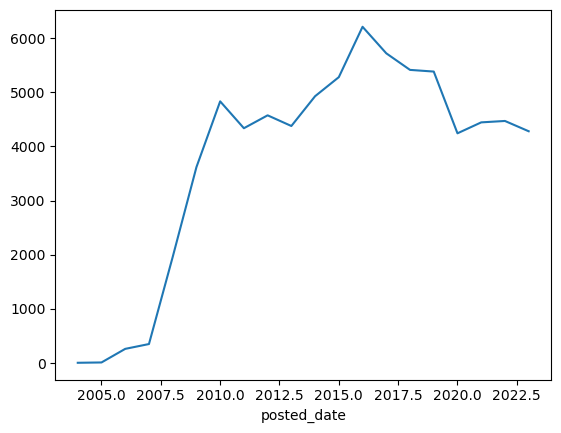

In [50]:
df.groupby(df["posted_date"].dt.year)["opportunity_id"].count().plot()

<Axes: xlabel='posted_date'>

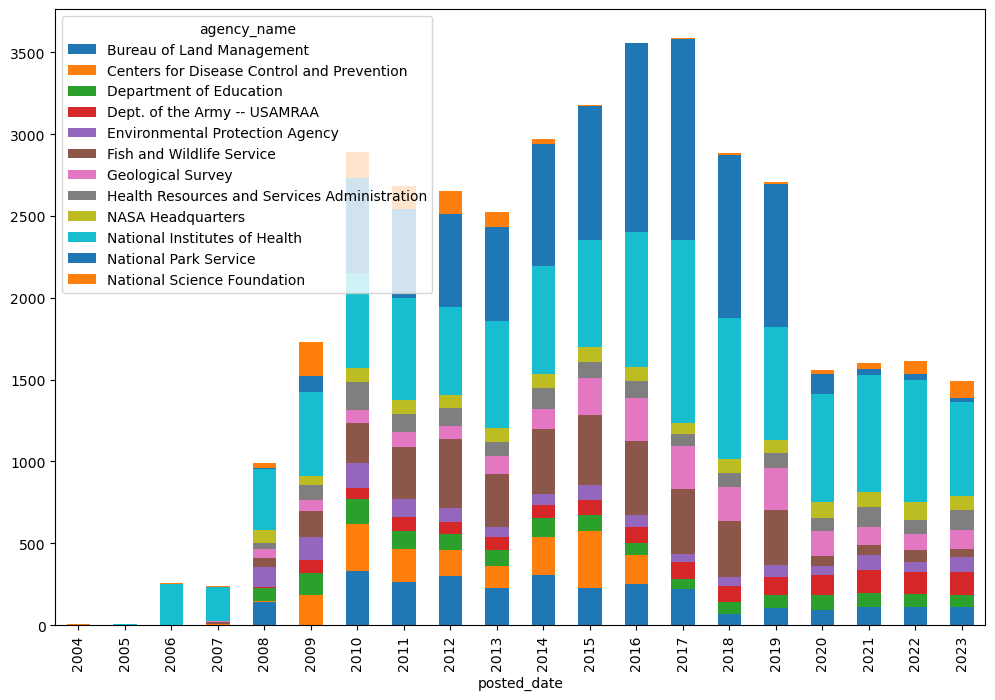

In [65]:
pivot = df[df["agency_name"].isin(agency_filter)].groupby([df["posted_date"].dt.year, "agency_name"])["opportunity_id"].count()
pivot = pivot.unstack()
pivot

fig, ax = plt.subplots(figsize=(12,8))
pivot.plot.bar(stacked=True, ax=ax)
#.plot()

In [49]:
df["posted_date"]

0       2023-09-28
1       2023-09-28
2       2023-09-28
3       2023-09-28
4       2023-09-28
           ...    
74664   2005-02-04
74665   2004-06-28
74666   2004-04-19
74667   2004-04-19
74668   2004-03-22
Name: posted_date, Length: 74669, dtype: datetime64[ns]

In [43]:
df.columns

Index(['opportunity_id', 'opportunity_number', 'opportunity_title',
       'agency_code', 'agency_name', 'estimated_funding',
       'expected_number_of_awards', 'grantor_contact', 'agency_contact_phone',
       'agency_contact_email', 'estimated_post_date',
       'estimated_application_due_date', 'posted_date', 'close_date',
       'last_updated_date_time', 'version', 'opportunity_status'],
      dtype='object')

In [40]:
pivot["count"].sum() / 74669

0.6909293013164767

In [22]:
df["agency_name"].value_counts().value_counts()

count
1      62
2      50
4      34
3      30
6      29
       ..
185     1
180     1
169     1
167     1
99      1
Name: count, Length: 160, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

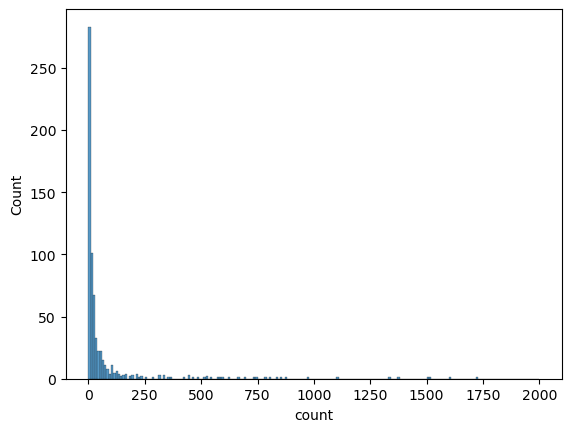

In [24]:
sns.histplot(df["agency_name"].value_counts(),binwidth=10, binrange=[0,2000] )

In [7]:
len(df)

74669

In [8]:
len(details)

2000